# Synthetic Data Generation

## Setup

In [11]:
!pip install --upgrade --quiet  langchain langchain_experimental langchain-openai

In [12]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel
from langchain_experimental.tabular_synthetic_data.openai import (
    OPENAI_TEMPLATE,
    create_openai_data_generator,
)
from langchain_experimental.tabular_synthetic_data.prompts import (
    SYNTHETIC_FEW_SHOT_PREFIX,
    SYNTHETIC_FEW_SHOT_SUFFIX,
)
from langchain_openai import ChatOpenAI

## Define the model

Every dataset has a structure or a "schema". The TransactionRecord class below serves as our schema for the synthetic data. By defining this, we're informing our synthetic data generator about the shape and nature of data we expect.

In [13]:
class TransactionRecord(BaseModel):
    transaction_id: str
    customer_id: str
    transaction_amount: float
    transaction_date: str
    payment_method: str
    product_category: str
    quantity: int
    customer_age: int
    customer_location: str
    device_used: str
    ip_address: str
    shipping_address: str
    billing_address: str
    is_fraudulent: int
    account_age_days: int
    transaction_hour: int

## Sample Data

To guide the synthetic data generator, it's useful to provide it with a few real-world-like examples. 
Here are some transaction records

In [14]:
examples = [
    { "example": """transaction_id: 44e09e24-74b9-4041-9894-8734ad525faa, customer_id: 379, transaction_amount: 10.01, transaction_date: 10/01/2024 20:08, payment_method: debit card, product_category: home & garden, quantity: 4, customer_age: 37, customer_location: Christopherland, device_used: desktop, ip_address: 211.189.218.190, shipping_address: 471 Mary Courts Apt. 872\nMaryhaven, KS 16126, billing_address: 471 Mary Courts Apt. 872\nMaryhaven, KS 16126, is_fraudulent: 1, account_age_days: 30, transaction_hour: 20"""},
    {"example": """transaction_id: aa81b9ff-034d-4d8e-bec6-ed29b8ae5d54, customer_id: 19.25, transaction_amount: 11/02/2024 16:54, transaction_date: bank transfer, payment_method: clothing, product_category: 1, quantity: 32, customer_age: Marymouth, customer_location: mobile, device_used: 126.224.150.175, ip_address: 68763 Bryant Points Suite 057\nGuzmanfort, ME 02932, shipping_address: 139 Lopez Neck\nCarterview, DE 85571, billing_address: 0, is_fraudulent: 131, account_age_days: 16, transaction_hour: 16"""},
    {"example": """transaction_id: 7ac1febd-3e94-457e-bfe4-acf081dc8da0, customer_id: 104.07, transaction_amount: 07/01/2024 15:41, transaction_date: PayPal, payment_method: electronics, product_category: 1, quantity: 43, customer_age: Paynefurt, customer_location: tablet, device_used: 195.31.145.184, ip_address: Unit 5864 Box 9572\nDPO AE 69746, shipping_address: Unit 5864 Box 9572\nDPO AE 69746, billing_address: 0, is_fraudulent: 53, account_age_days: 15, transaction_hour: 15"""},
]

## Craft a Prompt Template

The generator, like any other tool, needs some guidance. That’s where our prompt template comes in.

In [15]:
OPENAI_TEMPLATE = PromptTemplate(input_variables=["example"], template="{example}")

prompt_template = FewShotPromptTemplate(
    prefix=SYNTHETIC_FEW_SHOT_PREFIX,
    examples=examples,
    suffix=SYNTHETIC_FEW_SHOT_SUFFIX,
    input_variables=["subject", "extra"],
    example_prompt=OPENAI_TEMPLATE,
)

## Create the Data Generator

Once we have the schema and prompt in place, the next stage is to build the data generator.

In [16]:
synthetic_data_generator = create_openai_data_generator(
    output_schema=TransactionRecord,
    llm=ChatOpenAI(
        temperature=1,
          api_key="Add Your OpenAI API Key"
    ),  
    prompt=prompt_template,
)

## Generate Synthetic Data

In [17]:
synthetic_results = synthetic_data_generator.generate(
    subject="TransactionRecord",
    extra="Include details typical of fraudulent e-commerce transactions, such as unusually large transaction amounts or suspicious IP addresses",
    runs=15,
)

In [21]:
import pandas as pd

# Convert synthetic_results (a list of TransactionRecord objects) to a DataFrame
data = [record.dict() for record in synthetic_results]
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                          transaction_id customer_id  transaction_amount  \
0   44e09e24-74b9-4041-9894-8734ad525faa         379               10.01   
1   f7babb06-9315-4b94-86fd-26d3b3ba8dc2      215.84               27.99   
2   7ac1febd-3e94-457e-bfe4-acf081dc8da0      104.07                7.01   
3   44e09e24-74b9-4041-9894-8734ad525faa         379               10.01   
4   f7babb06-9315-4b94-86fd-26d3b3ba8dc2      215.84               27.99   
5   xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx      xxx.xx                0.00   
6   e57f1d6b-795d-4db5-aa1c-2612205977b4         742             1500.99   
7   f7babb06-9315-4b94-86fd-26d3b3ba8dc2      215.84               27.99   
8   xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx      xxx.xx                0.00   
9   e57f1d6b-795d-4db5-aa1c-2612205977b4         742             1500.99   
10               1a2b3c4d-5e6f-7g8h-9i0j      987.65             9999.99   
11  fd86ea87-0d33-426b-9046-801397d2030a      289.43             7500.00   
12  e57f1d6b

### Synthetic Data Generated

In [23]:
import pandas as pd

# Adjust display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks in the DataFrame display
pd.set_option('display.width', 1000)  # Set the display width to accommodate all columns

# Convert synthetic_results (a list of TransactionRecord objects) to a DataFrame
data = [record.dict() for record in synthetic_results]
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                          transaction_id customer_id  transaction_amount  transaction_date payment_method product_category  quantity  customer_age customer_location    device_used                                         ip_address                                   shipping_address                               billing_address  is_fraudulent  account_age_days  transaction_hour
0   44e09e24-74b9-4041-9894-8734ad525faa         379               10.01  10/01/2024 20:08     debit card    home & garden         4            37   Christopherland        desktop                                    211.189.218.190       471 Mary Courts Apt. 872 Maryhaven, KS 16126  471 Mary Courts Apt. 872 Maryhaven, KS 16126              1                30                20
1   f7babb06-9315-4b94-86fd-26d3b3ba8dc2      215.84               27.99  13/04/2023 09:23    credit card      electronics         3            29       Newburyport  203.45.167.88  5692 Hill Street Apt. 301\nNorth Vernon, NJ 58298  5692 Hill 

In [31]:
import pandas as pd

# Assuming synthetic_results is a list of TransactionRecord objects
data = [record.dict() for record in synthetic_results]
df = pd.DataFrame(data)

In [32]:
df.head()  # Display the first few rows of the DataFrame

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,ip_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour
0,44e09e24-74b9-4041-9894-8734ad525faa,379,10.01,10/01/2024 20:08,debit card,home & garden,4,37,Christopherland,desktop,211.189.218.190,"471 Mary Courts Apt. 872 Maryhaven, KS 16126","471 Mary Courts Apt. 872 Maryhaven, KS 16126",1,30,20
1,f7babb06-9315-4b94-86fd-26d3b3ba8dc2,215.84,27.99,13/04/2023 09:23,credit card,electronics,3,29,Newburyport,203.45.167.88,"5692 Hill Street Apt. 301\nNorth Vernon, NJ 58298","5692 Hill Street Apt. 301\nNorth Vernon, NJ 58298","5469 Adams Street\nSouth Haven, MA 30774",1,10,9
2,7ac1febd-3e94-457e-bfe4-acf081dc8da0,104.07,7.01,07/01/2024 15:41,PayPal,electronics,43,15,Paynefurt,tablet,195.31.145.184,Unit 5864 Box 9572 DPO AE 69746,Unit 5864 Box 9572 DPO AE 69746,1,15,15
3,44e09e24-74b9-4041-9894-8734ad525faa,379,10.01,10/01/2024 20:08,debit card,home & garden,4,37,Christopherland,desktop,211.189.218.190,"471 Mary Courts Apt. 872 Maryhaven, KS 16126","471 Mary Courts Apt. 872 Maryhaven, KS 16126",1,30,20
4,f7babb06-9315-4b94-86fd-26d3b3ba8dc2,215.84,27.99,13/04/2023 09:23,credit card,electronics,3,29,Newburyport,203.45.167.88,"5692 Hill Street Apt. 301 North Vernon, NJ 58298","5692 Hill Street Apt. 301 North Vernon, NJ 58298","5469 Adams Street South Haven, MA 30774",1,10,9


In [33]:
df.describe()  # Get summary statistics for numerical columns

,transaction_amount,quantity,customer_age,is_fraudulent,account_age_days,transaction_hour
count,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000
mean,2474.280667,4.60000,29.400000,0.866667,30.000000,12.733333
std,3743.402202,10.70247,14.326798,0.351866,21.794495,6.595092
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,10.010000,1.00000,28.500000,1.000000,10.000000,9.000000
50%,27.990000,2.00000,30.000000,1.000000,30.000000,14.000000
75%,3250.620000,3.00000,37.000000,1.000000,47.500000,17.000000
max,10000.000000,43.00000,45.000000,1.000000,60.000000,21.000000


In [34]:
df.info()  # Check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      15 non-null     object 
 1   customer_id         15 non-null     object 
 2   transaction_amount  15 non-null     float64
 3   transaction_date    15 non-null     object 
 4   payment_method      15 non-null     object 
 5   product_category    15 non-null     object 
 6   quantity            15 non-null     int64  
 7   customer_age        15 non-null     int64  
 8   customer_location   15 non-null     object 
 9   device_used         15 non-null     object 
 10  ip_address          15 non-null     object 
 11  shipping_address    15 non-null     object 
 12  billing_address     15 non-null     object 
 13  is_fraudulent       15 non-null     int64  
 14  account_age_days    15 non-null     int64  
 15  transaction_hour    15 non-null     int64  
dtypes: float64

In [40]:
!pip install seaborn matplotlib --quiet

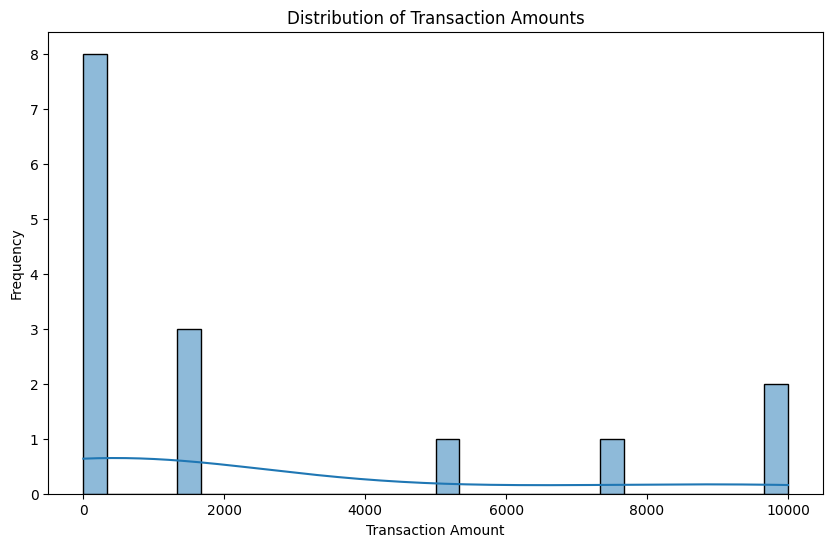

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

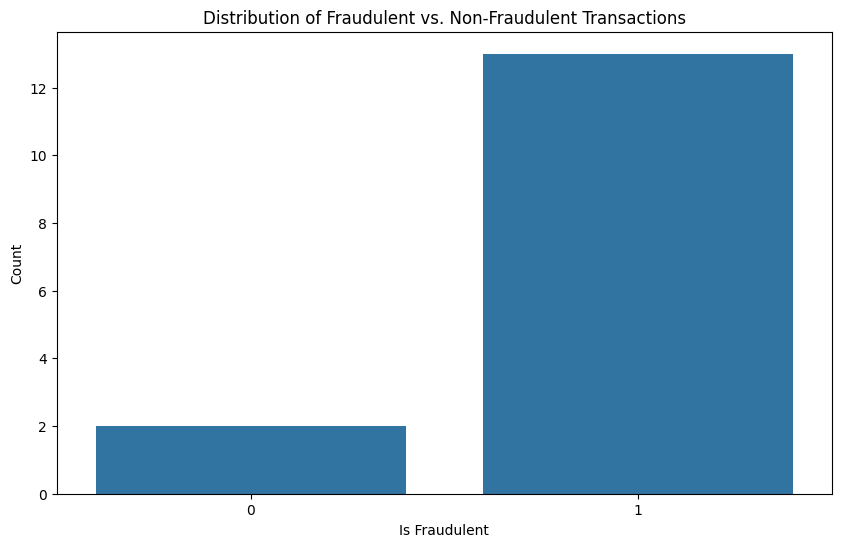

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraudulent', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

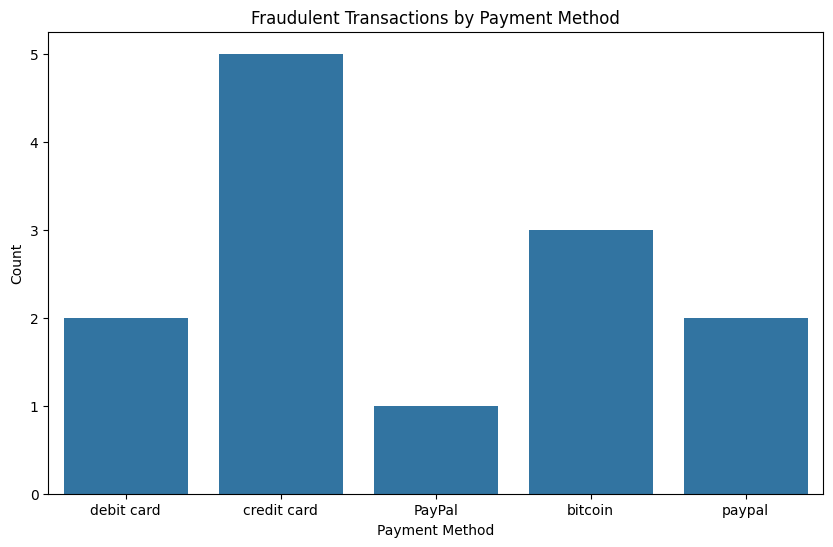

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_method', data=fraudulent_transactions)
plt.title('Fraudulent Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

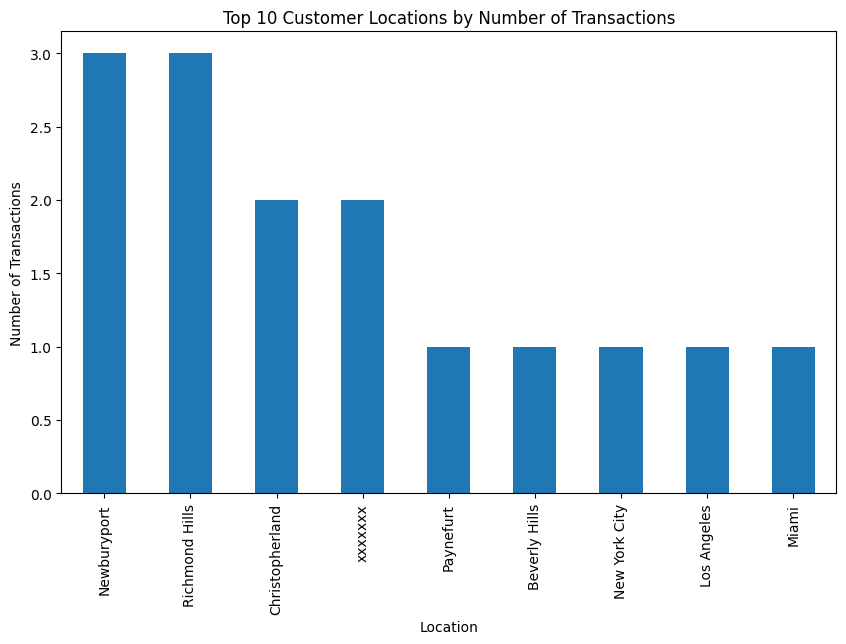

In [47]:
# Count transactions by customer location
location_counts = df['customer_location'].value_counts()

# Plot the top 10 locations
location_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customer Locations by Number of Transactions')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.show()